# ICU Mortality Analysis 


This notebook explores the MIMIC-III dataset, focusing on mortality analysis based on patient demographics and ICU admissions.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
admissions = pd.read_csv("ADMISSIONS.csv")
patients = pd.read_csv("PATIENTS.csv")

# Convert to datetime
admissions['admittime'] = pd.to_datetime(admissions['admittime'], errors='coerce')
patients['dob'] = pd.to_datetime(patients['dob'], errors='coerce')
patients['dod'] = pd.to_datetime(patients['dod'], errors='coerce')

# Filter out unrealistic DOBs
patients = patients[patients['dob'] >= pd.to_datetime("1900-01-01")]

# Merge and calculate age and mortality
admissions.rename(columns={'SUBJECT_ID': 'subject_id'}, inplace=True)
merged = admissions.merge(patients[['subject_id', 'gender', 'dob', 'dod']], on='subject_id', how='left')
merged = merged.dropna(subset=['admittime', 'dob'])
merged['age'] = (merged['admittime'] - merged['dob']).dt.days / 365.25
merged['mortality'] = merged['dod'].notnull().astype(int)

merged.head()


row_id  subject_id  hadm_id           admittime            dischtime  \
0   12258       10006   142345 2164-10-23 21:09:00  2164-11-01 17:15:00   
1   12263       10011   105331 2126-08-14 22:32:00  2126-08-28 18:59:00   
2   12265       10013   165520 2125-10-04 23:36:00  2125-10-07 15:13:00   
3   12269       10017   199207 2149-05-26 17:19:00  2149-06-03 18:42:00   
4   12270       10019   177759 2163-05-14 20:43:00  2163-05-15 12:00:00   

             deathtime admission_type         admission_location  \
0                  NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1  2126-08-28 18:59:00      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
2  2125-10-07 15:13:00      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3                  NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
4  2163-05-15 12:00:00      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   

  discharge_location insurance  ...            edregtime            edouttime  \
0   HOME HEALTH CARE  Medicare  ...  2164-10-23 16:43:00  2164-10-23 23:00:00   
1       DEAD/EXPIRED   Private  ...                  NaN                  NaN   
2       DEAD/EXPIRED  Medicare  ...                  NaN                  NaN   
3                SNF  Medicare  ...  2149-05-26 12:08:00  2149-05-26 19:45:00   
4       DEAD/EXPIRED  Medicare  ...                  NaN                  NaN   

             diagnosis hospital_expire_flag has_chartevents_data gender  \
0               SEPSIS                    0                    1      F   
1          HEPATITIS B                    1                    1      F   
2               SEPSIS                    1                    1      F   
3     HUMERAL FRACTURE                    0                    1      F   
4  ALCOHOLIC HEPATITIS                    1                    1      M   

         dob        dod        age mortality  
0 2094-03-05 2165-08-12  70.633812         1  
1 2090-06-05 2126-08-28  36.188912         1  
2 2038-09-03 2125-10-07  87.082820         1  
3 2075-09-21 2152-09-12  73.675565         1  
4 2114-06-20 2163-05-15  48.898015         1  

[5 rows x 24 columns]

## Age Distribution of ICU Patients

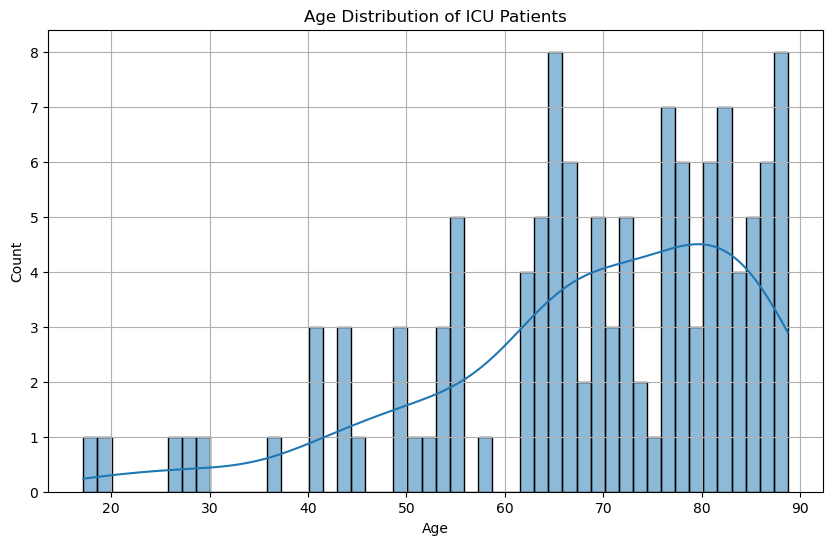

In [2]:

plt.figure(figsize=(10,6))
sns.histplot(merged['age'], bins=50, kde=True)
plt.title('Age Distribution of ICU Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()


## Mortality Rate by Age Group

C:\Users\mysel\AppData\Local\Temp\ipykernel_10556\3227956117.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_mortality = merged.groupby('age_group')['mortality'].mean().reset_index()


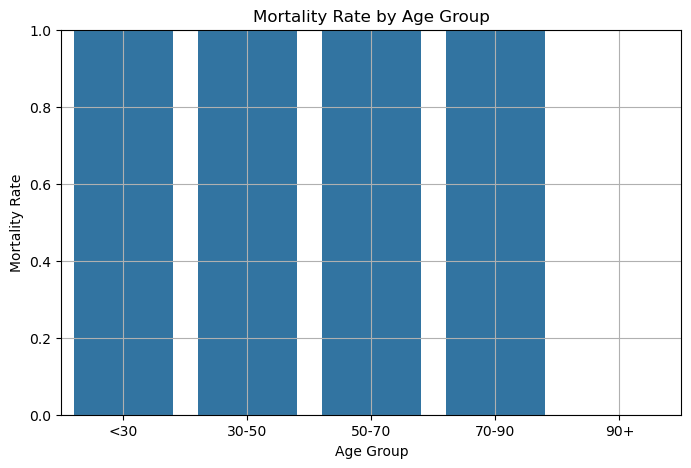

In [3]:

merged['age_group'] = pd.cut(merged['age'], bins=[0, 30, 50, 70, 90, 120], labels=['<30', '30-50', '50-70', '70-90', '90+'])
age_group_mortality = merged.groupby('age_group')['mortality'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=age_group_mortality, x='age_group', y='mortality')
plt.title('Mortality Rate by Age Group')
plt.ylabel('Mortality Rate')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


## Gender-Based Mortality Analysis

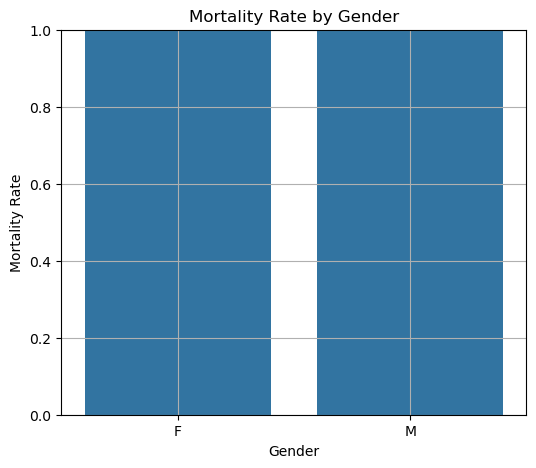

In [4]:

gender_mortality = merged.groupby('gender')['mortality'].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(data=gender_mortality, x='gender', y='mortality')
plt.title('Mortality Rate by Gender')
plt.ylabel('Mortality Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


## Engineered Features for Dashboard

In [5]:

dashboard_data = merged[['subject_id', 'age', 'gender', 'mortality', 'age_group']]
dashboard_data.to_csv("dashboard_summary.csv", index=False)
dashboard_data.head()


subject_id        age gender  mortality age_group
0       10006  70.633812      F          1     70-90
1       10011  36.188912      F          1     30-50
2       10013  87.082820      F          1     70-90
3       10017  73.675565      F          1     70-90
4       10019  48.898015      M          1     30-50